<a href="https://colab.research.google.com/github/v-ibarra/RNP_Diabetes_dataset/blob/main/VMIE_RNP_Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de datos estructurados por medio de una red neuronal profunda  

 

## Selección de la muestra  


> En formato de datos estructurados (.csv) 

>  Pueden ser de algún tema de investigación propio o puede ser tomado de algún repositorio de datos (por ejemplo, Kaggle).  

>  Debe contener una cantidad mínima de datos (>500 entradas)  

>  Debe contener una cantidad mínima de variables (>5 )  

>  El problema a resolver tiene que ser de clasificación (2 o más categorías) 

## Preprocesamiento de datos  

>   Eliminar columnas que no sean relevantes para el entrenamiento (columnas con un porcentaje de datos nulos > 30%, columnas que no son de utilidad para la red neuronal)  

>   En caso de que sea necesario a convertir a formato numérico hacer el respectivo mapeo, por ejemplo, en formato de fechas, o columnas que contengan caracteres y sea necesario convertirlo a clasificación (ejemplo “YES” ->1  “NO”-> 0)  

>  Ya que los datos están listos para la red neuronal separar la muestra en un porcentaje para entrenamiento (75%) y validación (25%) 

>  Para un mejor desempeño de la red neuronal normalizar los valores de las columnas para un valor entre 0 y 1  

## Definición de la red neuronal e hiperparametros  

> Definir la configuración inicial de la red neuronal (como recomendación empezar con una configuración básica e ir cambiando dependiendo del desempeño)  

> Seleccionar claramente los hiperparametros (factor de aprendizaje, funciones de activación, función de error, etc....) 

## Entrenamiento de la red neuronal  

> Realizar el entrenamiento de la red neuronal con keras 

> Dependiendo de los resultados ajustar los hiperparametros para optimizar la red neuronal 

> En caso de observar co-adaptacion de la red neuronal (overfitting) realizar un proceso de dropout   

> Guardar el modelo (formato .h5) 

## Análisis de resultados y presentacion 

>  Presentar los graficos finales de aprendizaje (error vs iteraciones,  accuracy vs iteraciones)  

 > Presentar los resultados en forma vistosa y facil de interpretar para el lector (libreta jupyter formateada con imágenes y texto descriptivo,  o algun medio para presentación de trabajo tipo blog como medium) recordar que gran parte de un trabajo es saber presentarlo y defenderlo     

## Conclusiones  

> Interpretar los resultados de la red neuronal    

> Discutir de que manera podria ser implementado en una aplicación  

> Discutir cuales serian las limitaciones de la red neuronal y de los resultados obtenidos.

 

 

 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
#from tensorflow.keras.callbacks import ReduceLROnPlateau

# **Análisis de datos para clasificación de personas femeninas, mayores a 21 años con Dx de Diabetes**


## Análisis Exploratorio de Datos (EDA)


Siempre es necesario importar los datos y realizar un "Análisis Exploratorio de Datos", ésto es con la finalidad de conocer la información con la que se va a trabajar, la manera en que se relacionan las variables, anomalías en el dataset, entre otras cosas.

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Buscamos valores nulos.

In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Formato de datos en el dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Verificamos la forma de nuestra base de datos.

In [5]:
df.shape

(768, 9)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [32]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Parece extraño el número de embarazos con 17, sin embargo es posible, según la presente base de datos.

In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Realizamos una matriz de correlación entre los datos.

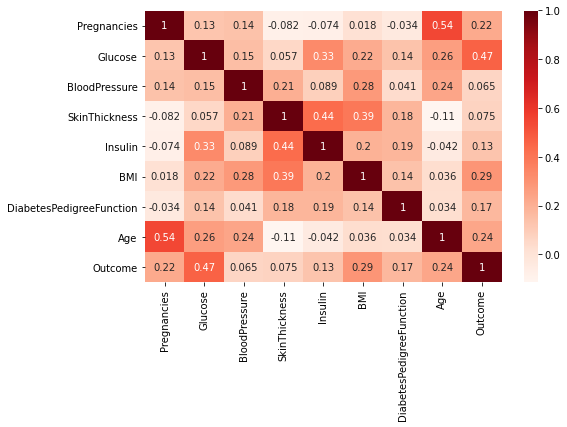

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='Reds',annot=True)

Para el presente ejercicio, y para no reducir más nuestro dataset, continuaremos con la misma información.

La relación entre las variables no está muy clara y parecen ser independientes unas de otras.

A continuación presentamos las variables y su frecuencia.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0a10d08d0>,
      dtype=object)

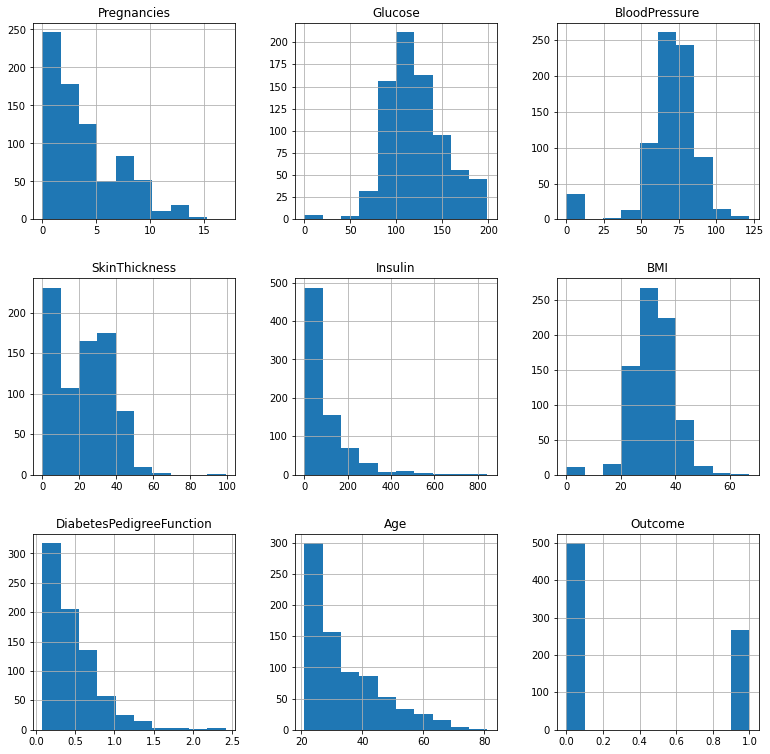

In [9]:
df.hist(figsize = (13,13))

## Procesamiento de datos

Vamos a preparar nuestros datos, para separar la información en 2 datasets:


> Variables
  * Columnas de nuestros datos.

> Categoría
* Para el presente set de datos es 0 para pacientes sin diabetes; 1 para pacientes con diabetes diagnosticada.





In [10]:
X_df = df
X_df = X_df.drop(['Outcome'], axis=1)
print(X_df)
y_df = df['Outcome']
print(y_df)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [11]:
print(X_df.shape)
print(y_df.shape)

(768, 8)
(768,)


Nuestro siguiente paso es establecer nuestros 2 grupos de datos:
> **Train**
>> Set de entrenamiento con las variables de entrada y la categoría.

>> *x_tr* y *y_tr*

> **Test**
>> Set de prueba con las variables de entrada y la categoría.

>> *x_ts* y *y_ts*

In [12]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, y_df, test_size = 0.25, random_state = 10)

y_tr = np.asarray(y_tr, dtype = np.int)
y_ts = np.asarray(y_ts, dtype = np.int)

y_tr = np.reshape(y_tr, [576,1])
y_ts = np.reshape(y_ts, [192,1])

print(x_ts.shape, 'x_ts')
print(x_tr.shape, 'x_tr')
print(y_ts.shape, 'y_ts')
print(y_tr.shape, 'y_tr')

(192, 8) x_ts
(576, 8) x_tr
(192, 1) y_ts
(576, 1) y_tr


In [13]:
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (576, 8)
Testing Data : (192, 8)


## Normalización de valores

Normalizaremos los valores de nuestro dataset, para evitar tener rangos de valores muy grandes, y poder trabajar en nuestro modelo. 

In [14]:
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (576, 8)
Testing Data : (192, 8)


## Red Neuronal e Hyperparámetros

A continuación se muestran algunos de los modelos realizados con distintos parámetros.


No todos los modelos realizados son presentados en la presente libreta.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 26ms/step - loss: 0.6942 - accuracy: 0.5259 - val_loss: 0.6853 - val_accuracy: 0.6094
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.6195 - val_loss: 0.6798 - val_accuracy: 0.6302
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.6550 - val_loss: 0.6765 - val_accuracy: 0.6302
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 

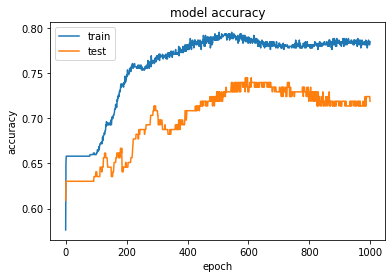

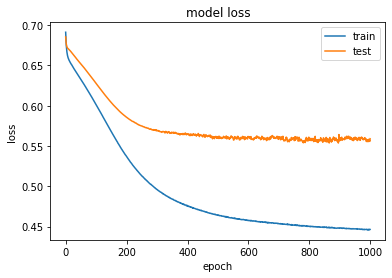

Maximum Loss : 0.6911

Minimum Loss : 0.4459

Loss difference : 0.2452


In [15]:
# Hyperparameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.01 # The learning rate


# create a model
def create_model():
    model = tf.keras.Sequential()
    # Hidden layer
    model.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Hidden layer 2
    #model.add(tf.keras.layers.Dense(20, input_dim=8,activation='sigmoid'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()


results = model.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 1
)


print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.6890 - accuracy: 0.6315 - val_loss: 0.6819 - val_accuracy: 0.6302
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6653 - val_loss: 0.6789 - val_accuracy: 0.6302
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.6471 -

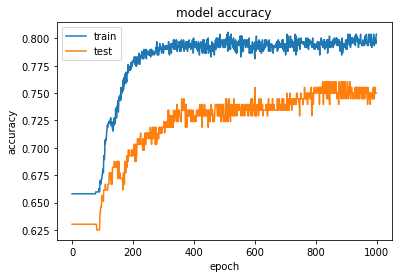

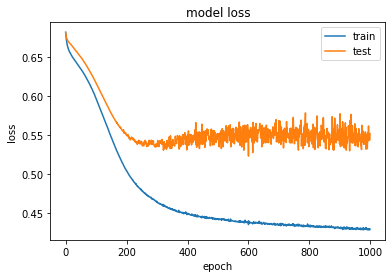

Maximum Loss : 0.6824

Minimum Loss : 0.4282

Loss difference : 0.2542


In [16]:
# Hyperparameters
training_epochs1 = 1000 # Total number of training epochs
learning_rate1 = 0.01 # The learning rate
#momentum = 0.9

# create a model
def create_model1():
    model1 = tf.keras.Sequential()
    # Hidden layer
    model1.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Hidden layer 2
    model1.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Output layer
    model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model1.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model1

model1 = create_model1()
model1.summary()


results1 = model1.fit(
    x_tr, y_tr,
    epochs= training_epochs1,
    validation_data = (x_ts, y_ts),
    verbose = 1
)


print("Evaluating on training set...")
(loss, accuracy) = model1.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model1.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results1.history['accuracy'])
plt.plot(results1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results1.history['loss'])
plt.plot(results1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss1 = np.max(results1.history['loss'])
min_loss1 = np.min(results1.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss1))
print("")
print("Minimum Loss : {:.4f}".format(min_loss1))
print("")
print("Loss difference : {:.4f}".format((max_loss1 - min_loss1)))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                270       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                372       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
116/116 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.5669 - val_loss: 0.6659 -

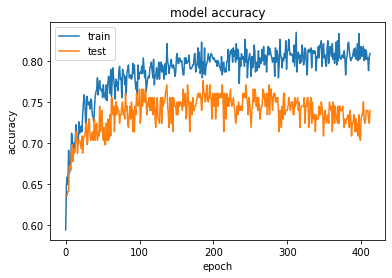

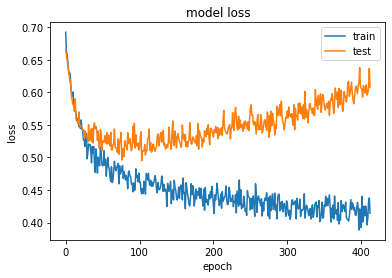

Maximum Loss : 0.6923

Minimum Loss : 0.3887

Loss difference : 0.3036


In [17]:
# Hyperparameters
training_epochs2 = 1000 # Total number of training epochs
learning_rate2 = 0.01 # The learning rate
momentum = 0.9

# create a model
def create_model2():
    model2 = tf.keras.Sequential()
    # Hidden layer 1
    model2.add(tf.keras.layers.Dense(30, input_dim=8,activation='relu'))
    model2.add(Dropout(0.5))
    # Hidden layer 2
    model2.add(tf.keras.layers.Dense(12, input_dim=30,activation='relu'))
    model2.add(Dropout(0.5))
    # Output layer
    model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model2.compile(loss='binary_crossentropy', 
                  optimizer='adam', #tf.keras.optimizers.SGD(learning_rate2, momentum),
                  metrics=['accuracy'])
    return model2

model2 = create_model2()
model2.summary()


my_callbacks = [
    EarlyStopping(monitor='accuracy',patience=100),

]

results2 = model2.fit(
    x_tr, y_tr,
    epochs= training_epochs2,
    batch_size=5,
    validation_data = (x_ts, y_ts),
    callbacks=my_callbacks,
    verbose = 1
)



print("Evaluating on training set...")
(loss, accuracy) = model2.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model2.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss2 = np.max(results2.history['loss'])
min_loss2 = np.min(results2.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss2))
print("")
print("Minimum Loss : {:.4f}".format(min_loss2))
print("")
print("Loss difference : {:.4f}".format((max_loss2 - min_loss2)))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 21        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 2         
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.7810 - accuracy: 0.3152 - val_loss: 0.7417 - val_accuracy: 0.3698
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.7360 - accuracy: 0.3723 - val_loss: 0.7224 - val_accuracy: 0.3698
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.7220 - accuracy: 0.3506 -

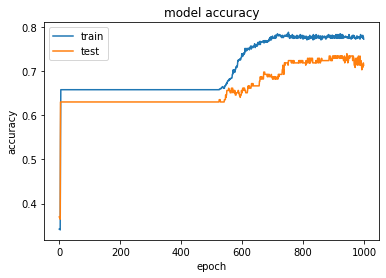

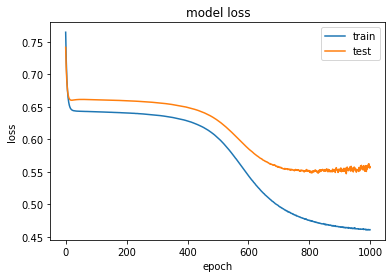

Maximum Loss : 0.7650

Minimum Loss : 0.4606

Loss difference : 0.3044


In [25]:
# Hyperparameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.02 # The learning rate


# create a model
def create_model3():
    model3 = tf.keras.Sequential()
    # Hidden layer
    model3.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Hidden layer 2
    model3.add(tf.keras.layers.Dense(1, input_dim=8,activation='sigmoid'))
    # Output layer
    model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model3.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model3

model3 = create_model3()
model3.summary()


results3 = model3.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 1
)


print("Evaluating on training set...")
(loss, accuracy) = model3.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model3.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results3.history['accuracy'])
plt.plot(results3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss3 = np.max(results3.history['loss'])
min_loss3 = np.min(results3.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss3))
print("")
print("Minimum Loss : {:.4f}".format(min_loss3))
print("")
print("Loss difference : {:.4f}".format((max_loss3 - min_loss3)))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 21        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 2         
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.6926 - accuracy: 0.4953 - val_loss: 0.6863 - val_accuracy: 0.6302
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.6554 - val_loss: 0.6800 - val_accuracy: 0.6302
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.6411 

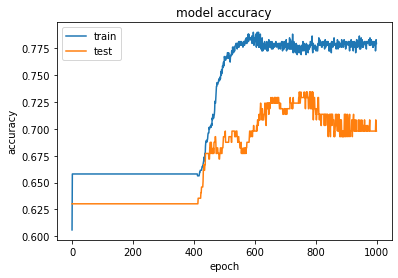

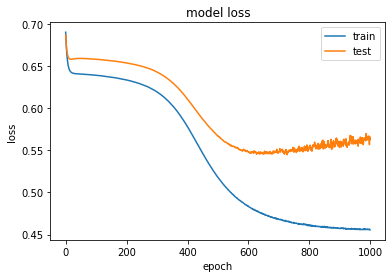

Maximum Loss : 0.6899

Minimum Loss : 0.4555

Loss difference : 0.2345


In [28]:
# Hyperparameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.02 # The learning rate


# create a model
def create_model4():
    model4 = tf.keras.Sequential()
    # Hidden layer
    model4.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Hidden layer 2
    model4.add(tf.keras.layers.Dense(1, input_dim=8,activation='sigmoid'))
    # Output layer
    model4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model4.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model4

model4 = create_model4()
model4.summary()


results4 = model4.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 1
)


print("Evaluating on training set...")
(loss, accuracy) = model4.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model4.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results4.history['accuracy'])
plt.plot(results4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results4.history['loss'])
plt.plot(results4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss4 = np.max(results4.history['loss'])
min_loss4 = np.min(results4.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss4))
print("")
print("Minimum Loss : {:.4f}".format(min_loss4))
print("")
print("Loss difference : {:.4f}".format((max_loss4 - min_loss4)))

Guardamos los modelos de nuestro ejercicio en formato h5

In [29]:
model.save('diabetes.h5', save_format= 'h5')
model1.save('diabetes1.h5', save_format= 'h5')
model2.save('diabetes2.h5', save_format= 'h5')
model3.save('diabetes3.h5', save_format= 'h5')
model4.save('diabetes4.h5', save_format= 'h5')